<a href="https://colab.research.google.com/github/faranbutt/Machine-Learing-MIPT/blob/main/Linear_Regression_From_Scratch_(Concepts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np

In [3]:
n_objects = 100
n_features = 2
X = np.random.uniform(-10,10,(n_objects,n_features))
X[:3]

array([[ 9.72927716, -1.83356482],
       [ 9.32370171, -0.30250691],
       [ 3.01609306, -6.42490384]])

In [4]:
w_true = np.random.normal(0,1,n_features)
w_true

array([ 0.59000932, -0.13730742])

$y = Xw + ϵ$

Where

$X$ = no of features

$w$ = weights

$ϵ$ = Gaussian noise


In [5]:
y = X.dot(w_true)+ np.random.normal(0,1,n_objects)
y[:3]

array([4.93312342, 6.35505831, 2.0169929 ])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape

((70, 2), (30, 2))

In [8]:
import plotly.graph_objects as go
import plotly.express as px

In [9]:
X1_grid,X2_grid = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),20),np.linspace(X[:,1].min(),X[:,1].max(),20))
y_grid = w_true[0] * X1_grid + w_true[1] * X2_grid
fig_3d = go.Figure()
fig_3d.add_trace(go.Scatter3d(x=X_train[:,0],y=X_train[:,1],z=y_train,mode='markers',marker=dict(size=3),name="Train Data"))
fig_3d.add_trace(go.Scatter3d(x=X_test[:,0],y=X_test[:,1],z=y_test,mode='markers',marker=dict(size=3),name="Test Data"))
fig_3d.add_trace(go.Surface(z=y_grid,x=X1_grid,y=X2_grid,colorscale='Viridis',opacity=0.7))
fig_3d.update_layout(title="3D Regression Plane",
                     scene=dict(xaxis_title="Feature 1",
                                yaxis_title="Feature 2",
                                zaxis_title="Target (y)"),
                     margin=dict(l=0, r=0, b=0, t=40))
fig_3d.show()

Analytical Solution leads to

$w = (X^TX)^{-1}X^TY$

In [10]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([ 0.58979946, -0.12345194])

In [11]:
np.abs(w_true-w)

array([0.00020986, 0.01385548])

Higly correlated features $(X^TX)^{-1}$ doesent exist.Because of Singularity

In [12]:
X_corr = np.copy(X)
X_corr[:,1] = 2 * X[:,0]
y_cor = X_corr.dot(w_true) + np.random.normal(0,1,n_objects)
w = np.linalg.inv(X_corr.T.dot(X_corr)).dot(X_corr.T).dot(y_cor)
w

LinAlgError: Singular matrix

In [13]:
X_cor = np.copy(X)
X_cor[:,1] = 2 * X_cor[:,0] + np.random.normal(0,1e-3,n_objects)
y_cor = X_cor.dot(w_true) + np.random.normal(0,1,n_objects)
w_cor = np.linalg.inv(X_cor.T.dot(X_cor)).dot(X_cor.T).dot(y_cor)
w_cor

array([-281.23424669,  140.77600159])

In [14]:
np.abs(w_true-w_cor)

array([281.82425601, 140.913309  ])

In [15]:
l = 1
w_cor = np.linalg.inv(X_cor.T.dot(X_cor) + l * np.eye(n_features)).dot(X_cor.T).dot(y_cor)
np.abs(w_true-w_cor)

array([0.53255454, 0.26723447])

In [16]:
l = 0.1
w_cor = np.linalg.inv(X_cor.T.dot(X_cor) + l * np.eye(n_features)).dot(X_cor.T).dot(y_cor)
np.abs(w_true-w_cor)

array([0.58660375, 0.29426642])

In [17]:
l = 0.01
w_cor = np.linalg.inv(X_cor.T.dot(X_cor) + l * np.eye(n_features)).dot(X_cor.T).dot(y_cor)
np.abs(w_true-w_cor)

array([1.12598448, 0.56395793])

# Gradient Descent

In [18]:
n_objects = 1000
n_features = 2
X = np.random.uniform(-10,10,(n_objects,n_features))
y = X.dot(w_true) + np.random.normal(0,1,n_objects)

In [19]:
w_0 = np.random.uniform(-1,1,n_features)
w_0

array([ 0.38591889, -0.63002328])

In [20]:
num_steps = 50
learning_rate = 1e-3
w = w_0.copy()
w_list = [w.copy()]
for i in range(num_steps):
  w -= learning_rate * 2. * X.T.dot(X.dot(w) - y)/len(y)
  w_list.append(w.copy())
w_list = np.array(w_list)

In [21]:
np.abs(w_true-w)

array([0.01842878, 0.02529297])

In [22]:
import matplotlib.pyplot as plt

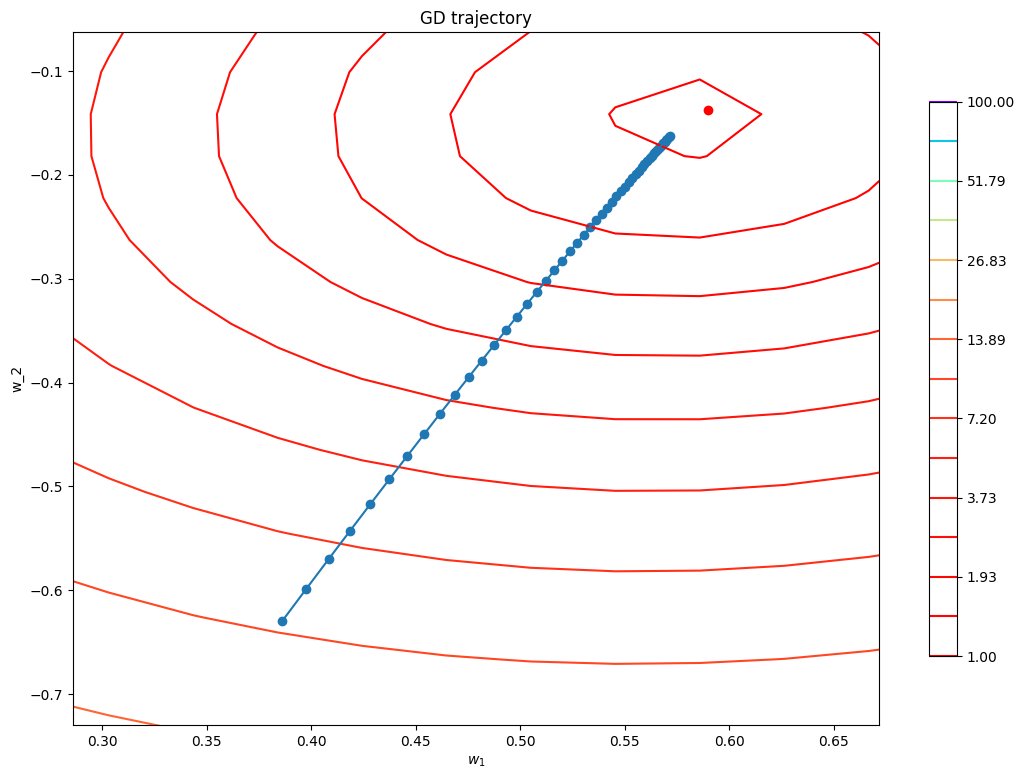

In [23]:
A,B = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
levels = np.empty_like(A)
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
   w_tmp = np.array([A[i,j],B[i,j]])
   levels[i,j] = np.mean(np.power(np.dot(X,w_tmp) - y, 2))

plt.figure(figsize=(13,9))
plt.title("GD trajectory")
plt.xlabel("$w_1$")
plt.ylabel("w_2")
plt.xlim(w_list[:,0].min()-0.1,w_list[:,0].max()+0.1)
plt.ylim(w_list[:,1].min()-0.1,w_list[:,1].max()+0.1)

CS = plt.contour(A,B,levels,levels = np.logspace(0,2,num=15),cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS,shrink=0.8,extend='both')
plt.scatter(w_list[:,0],w_list[:,1])
plt.scatter(w_true[0],w_true[1],c='r')
plt.plot(w_list[:,0],w_list[:,1])
plt.show()

# Stocastic Gradient Descent

In [24]:
no_of_steps = 50
learning_rate = 1e-3
batch_size = 10

w_0 = np.random.uniform(-1,1,n_features)
w = w_0.copy()

w_list = [w.copy()]

for i in range(no_of_steps):
  idx = np.random.randint(0,n_objects,batch_size)
  X_batch = X[idx,:]
  y_batch = y[idx]
  w -= learning_rate * (2./batch_size) * np.dot(X_batch.T,(X_batch.dot(w)-y_batch))
  w_list.append(w.copy())
w_list = np.array(w_list)


In [25]:
np.abs(w_true - w)

array([0.04059246, 0.00244507])

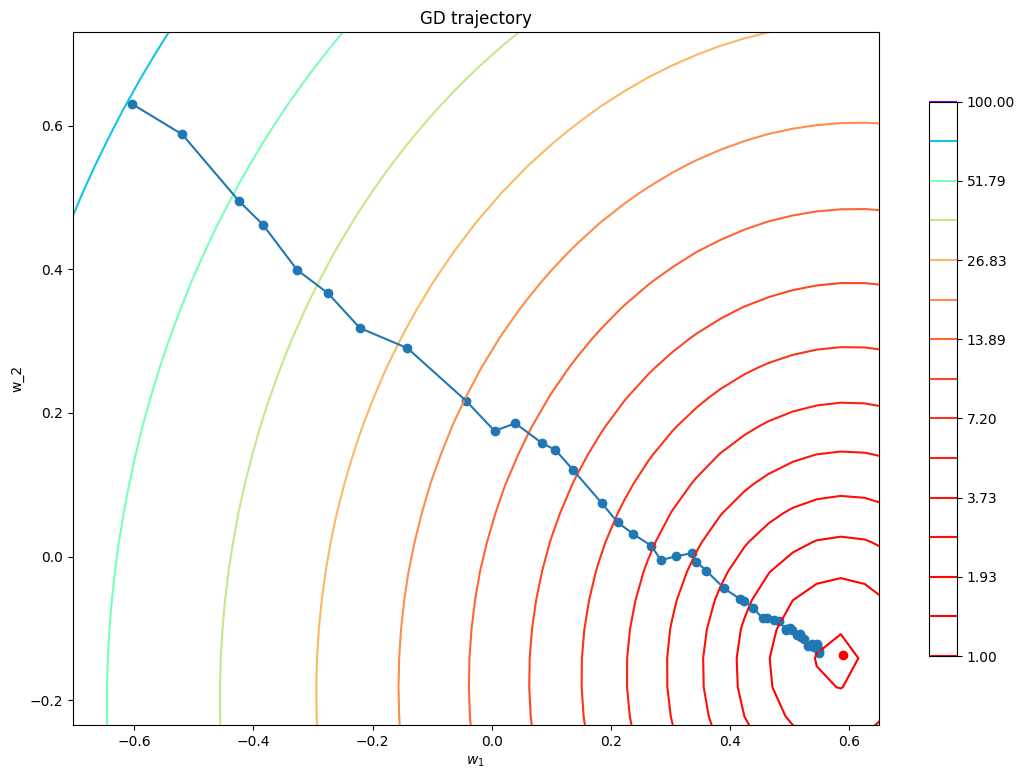

In [26]:
A,B = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
levels = np.empty_like(A)
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
   w_tmp = np.array([A[i,j],B[i,j]])
   levels[i,j] = np.mean(np.power(np.dot(X,w_tmp) - y, 2))

plt.figure(figsize=(13,9))
plt.title("GD trajectory")
plt.xlabel("$w_1$")
plt.ylabel("w_2")
plt.xlim(w_list[:,0].min()-0.1,w_list[:,0].max()+0.1)
plt.ylim(w_list[:,1].min()-0.1,w_list[:,1].max()+0.1)

CS = plt.contour(A,B,levels,levels = np.logspace(0,2,num=15),cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS,shrink=0.8,extend='both')
plt.scatter(w_list[:,0],w_list[:,1])
plt.scatter(w_true[0],w_true[1],c='r')
plt.plot(w_list[:,0],w_list[:,1])
plt.show()

# Custom Version of Linear Regression

In [27]:
from sklearn.base import BaseEstimator, RegressorMixin

In [40]:
class LinearRegressionSGD(BaseEstimator, RegressorMixin):
  def __init__(self,batch_size=25,learning_rate=1e-3,no_of_steps=100):
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    self.no_of_steps = no_of_steps

  def fit(self,X,y):
    no_of_featues = X.shape[1]
    no_of_objects = X.shape[0]
    w = np.random.uniform(-1,1,no_of_featues)
    for i in range(self.no_of_steps):
      idx = np.random.randint(0,no_of_objects,self.batch_size)
      X_batch = X[idx,:]
      y_batch = y[idx]
      w -= self.learning_rate * (2./self.batch_size) * np.dot(X_batch.T,(X_batch.dot(w)-y_batch))

    self.w = w
    return self
    return self
  def predict(self,X):
    return X.dot(self.w)


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
lr = LinearRegressionSGD().fit(X_train,y_train)
lr.score(X_test,y_test)

0.9314280121725351

In [42]:
np.mean(np.abs(w_true - lr.w))

0.017186149565391037

In [50]:
n_objects = 100000
n_features = 1000
X = np.random.uniform(-10,10,(n_objects,n_features))
w_true = np.random.normal(0,1,n_features)
y = X.dot(w_true) + np.random.normal(0,1,n_objects)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
lr = LinearRegressionSGD().fit(X_train,y_train)
lr.score(X_test,y_test)

-141.6623448129757

In [52]:
np.mean(np.abs(w_true - lr.w))

9.572736388314398

# Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr = LinearRegressionSGD().fit(X_train_scaled,y_train)
lr.score(X_test_scaled,y_test)

0.2966645804061956

In [62]:
np.mean(np.abs(w_true,lr.w))

0.7967787265355243

# Linear Regression Normal Way

In [66]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import time

In [65]:
lr = LinearRegression()
time_begin = time.time()
lr.fit(X_train,y_train)
print(f"Time taken: {time.time() - time_begin}")
print(f"Score: {lr.score(X_test,y_test)}")

Time taken: 12.369683980941772
Score: 0.9999700941144019


In [67]:
lr = Ridge(alpha=0.0, solver='sparse_cg')
time_begin = time.time()
lr.fit(X_train,y_train)
print(f"Time taken: {time.time() - time_begin}")
print(f"Score: {lr.score(X_test,y_test)}")

Time taken: 1.0719728469848633
Score: 0.9999700951905033


In [69]:
lr = Lasso(alpha=1)
time_begin = time.time()
lr.fit(X_train,y_train)
print(f"Time taken: {time.time() - time_begin}")
print(f"Score: {lr.score(X_test,y_test)}")

Time taken: 1.9096736907958984
Score: 0.999063934002388


In [70]:
from sklearn.pipeline import make_pipeline

In [71]:
pipeline = make_pipeline(
    StandardScaler(),
    Ridge(alpha=0.0, solver='sparse_cg')
)
time_begin = time.time()
pipeline.fit(X_train,y_train)
print(f"Time taken: {time.time() - time_begin}")
print(f"Score: {pipeline.score(X_test,y_test)}")

Time taken: 2.0375218391418457
Score: 0.999970095418998
